## Here We will discuss about 10 different techniques to handle Data Imbalance:

#### Importing Required Dependencies:

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import SCORERS, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("credit-card.csv")
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [3]:
df.shape


(9492, 32)

In [52]:
df.Class.value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [5]:
#seperating fraudelent and non fraudlent data

df_0 = df[df['Class'] == 0]
df_1 = df[df['Class'] == 1]

In [6]:
df_0.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
492,236031,148645.0,2.087131,0.174699,-1.762514,0.378010,0.515231,-0.785758,0.199287,-0.241249,...,-0.372191,-0.951858,0.317775,0.386025,-0.228262,0.180525,-0.061110,-0.031560,1.29,0
493,271257,164489.0,0.039062,0.889239,0.302199,-0.585161,0.431838,-1.116524,1.050711,-0.232965,...,-0.253421,-0.535450,0.072419,0.050588,-0.475029,0.136236,0.248946,0.098623,5.99,0
494,218413,141305.0,-0.334332,-0.279289,0.558407,-2.721258,0.222245,0.105259,0.424721,-0.808027,...,-0.332232,0.203322,-0.152383,0.015132,-0.389804,-0.234411,-0.325232,-0.354962,20.00,0
495,128653,78791.0,1.145310,0.038190,1.103411,1.676224,-0.881220,-0.371989,-0.297177,0.009028,...,-0.092300,0.083340,-0.058040,0.749869,0.647730,-0.308037,0.058254,0.029025,5.00,0
496,153965,100832.0,1.890476,-0.561657,0.129218,0.394991,-0.803205,0.139739,-1.054481,0.121556,...,-0.061418,0.139415,0.258049,-0.424712,-0.630249,0.445302,-0.044791,-0.052782,39.00,0


In [7]:
df_0.Class.value_counts()

0    9000
Name: Class, dtype: int64

In [8]:
df_1.Class.value_counts()

1    492
Name: Class, dtype: int64

In [9]:
# check the number of 1s and 0s
count = df['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 9000
5.466666666666667


In [54]:
import warnings
warnings.filterwarnings('ignore')

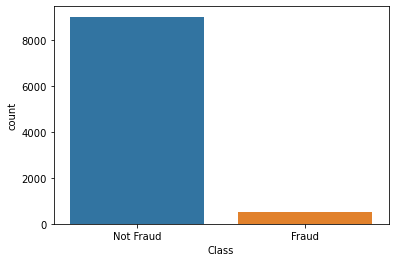

In [56]:
# plot the no of 1's and 0's
g = sns.countplot(df['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [12]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

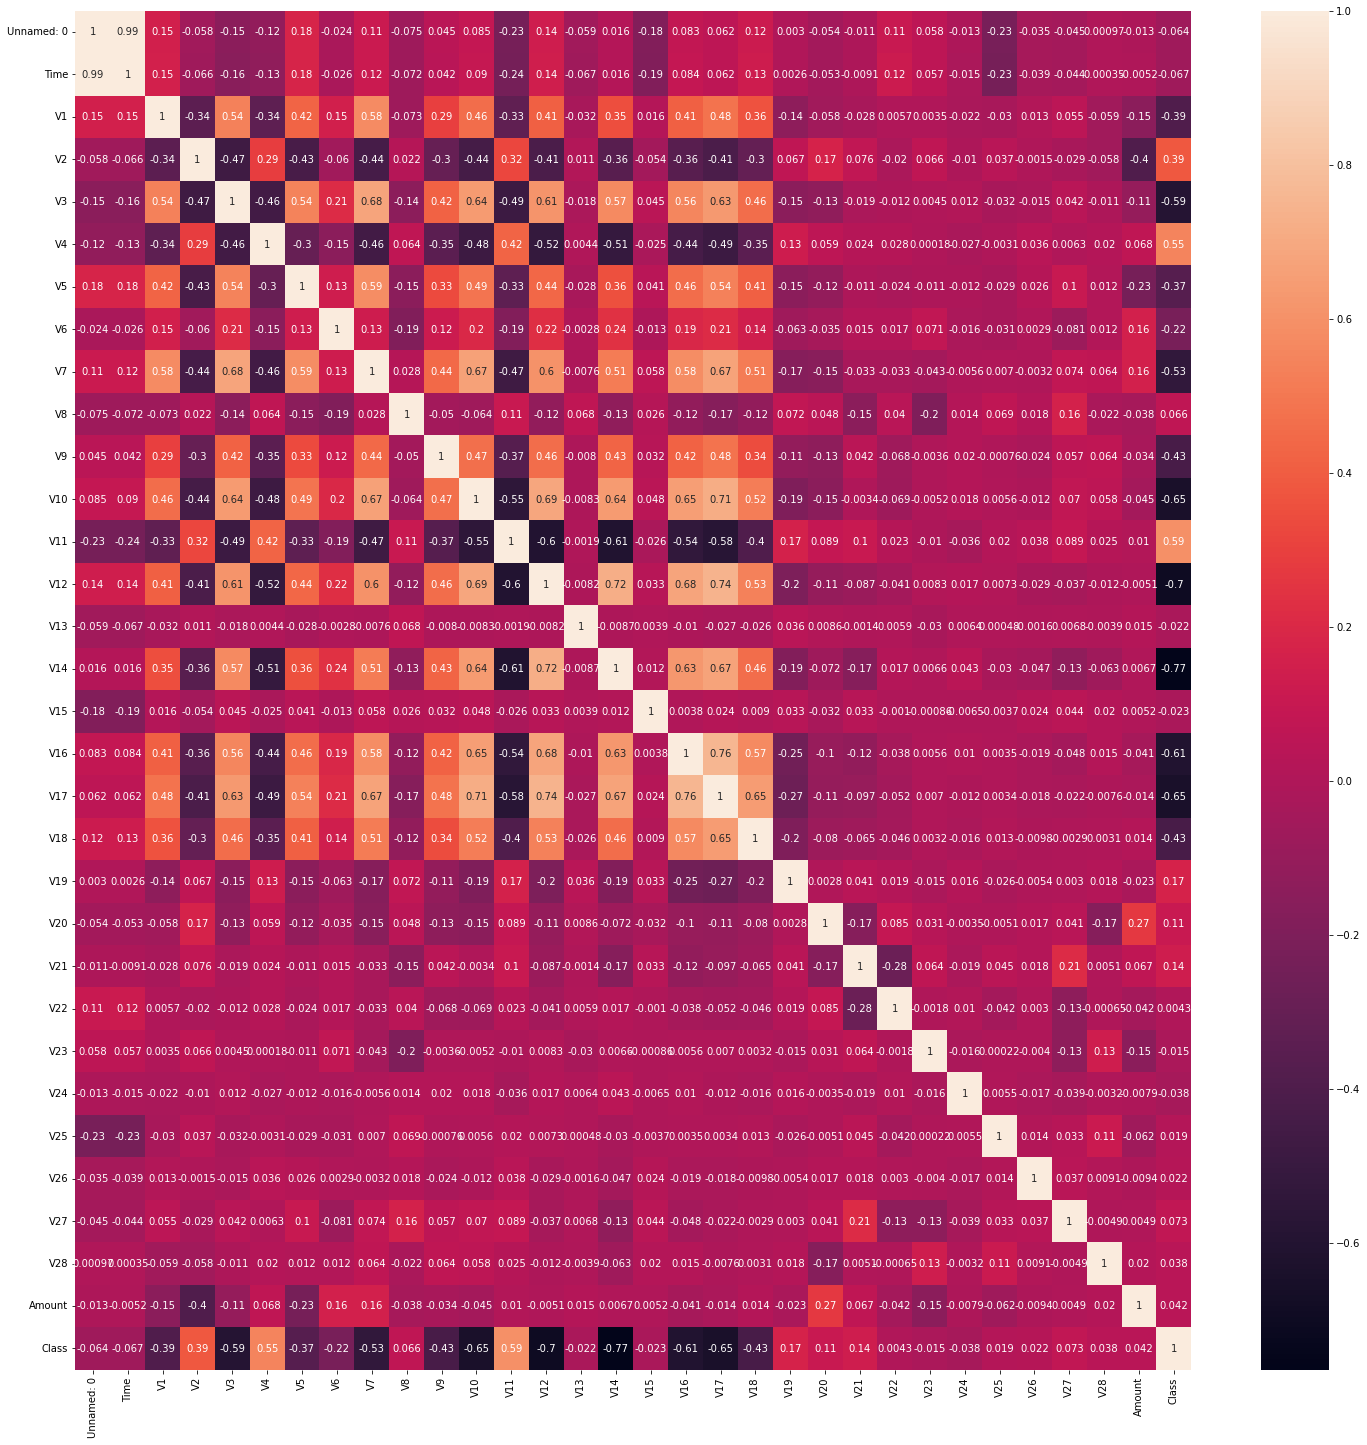

In [57]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Seperating Target and Features:

In [60]:
X = df.drop(columns="Class", axis=1) #features
y = df['Class'] #target


In [61]:
print(X)

      Unnamed: 0      Time        V1        V2        V3        V4        V5  \
0            541     406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188   
1            623     472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805   
2           4920    4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628   
3           6108    6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131   
4           6329    7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201   
...          ...       ...       ...       ...       ...       ...       ...   
9487      207634  136765.0 -5.493186  4.057918 -1.795148 -0.522112 -3.901231   
9488      210369  137949.0  1.939843 -0.434933 -0.345178  0.307799 -0.487803   
9489      211880  138612.0  1.798427 -0.160432 -1.920048  1.051255  1.204895   
9490      273066  165405.0  2.114637 -0.211168 -1.638108 -0.010894  0.490466   
9491      126327   77984.0 -0.298551  1.100801  0.841074 -0.335169  0.714700   

            V6        V7        V8  ...

In [59]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
9487    0
9488    0
9489    0
9490    0
9491    0
Name: Class, Length: 9492, dtype: int64


#### Train Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

### Training the Model Using Logistic Regression

In [64]:
# creating an instance of the model

model = LogisticRegression()

model.fit(X, y)

y_predict = model.predict(X)

In [65]:
accuracy_score(y_predict, y)

0.9880952380952381

In [66]:
np.unique(y_predict)

array([0, 1])

#### XGB Classifier:

In [19]:
# import model
from xgboost import XGBClassifier

In [20]:
xgb_model = XGBClassifier()

In [21]:
xgb_model.fit(X_train, y_train)

[13:50:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
#predict

xgb_y_predict = xgb_model.predict(X_test)

In [23]:
# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

In [24]:
print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score(xgb_y_predict, y_test))

Accuracy score is: 0.995260663507109
Roc auc scote: 0.9854186952288218
F1 core: 0.9447852760736196


In [25]:
confusion_matrix(xgb_y_predict, y_test)

array([[1813,    7],
       [   2,   77]])

##  Resampling Techniques:

In [26]:
# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# divie class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

In [27]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 32)

class 1: (492, 32)


## Technique 1. Random under sampling

total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


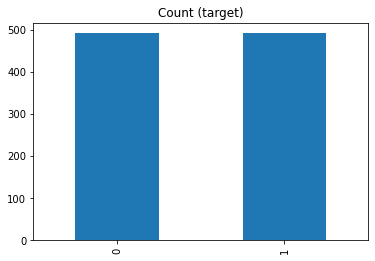

In [28]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Technique 2: Random over sampling

class count of 1 and 0:
 1    9000
0    9000
Name: Class, dtype: int64


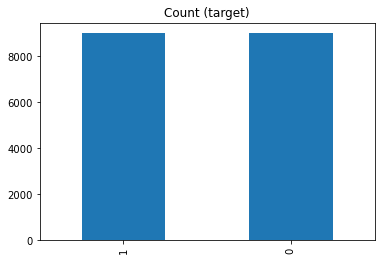

In [29]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module:

In [43]:
# import library
import imblearn

## Technique 3: Random under-sampling with imblearn:

In [30]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)


In [33]:
# fit predictor and target varialbe
X_rus, y_rus = rus.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


##  Technique 4 :Random over-sampling with imblearn:

In [34]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9000, 1: 492})
Resample dataset shape Counter({1: 9000, 0: 9000})


## Technique 5 : Under-sampling Tomek links

In [37]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
X_tl, y_tl = tl.fit_resample(X,y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 8829, 1: 492})


## Technique 6 : Synthetic minority over-sampling technique:

In [39]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
X_smote , y_smote = smote.fit_resample(X, y)

print('Origianl dataset shape:', Counter(y))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 9000, 1: 492})
Resampple dataset shape: Counter({1: 9000, 0: 9000})


## Technique 7 : NearMiss(Under Sampling):

In [42]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

X_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9000, 1: 492})
Resample dataset shape: Counter({0: 492, 1: 492})


## Technique 8 : Changing the performance metric:

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_nm, y_nm, test_size =0.20, random_state=32)

m = XGBClassifier()
m.fit(X_train1, y_train1)
predict_y = m.predict(X_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

[14:04:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROCAUC score: 0.969143446852425
Accuracy score: 0.9695431472081218
F1 score: 0.9680851063829788


## Technique 9: Penalize algorithm (cost-sensitive training):

In [47]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)

In [48]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.5520070838252656
Accuracy score: 0.46919431279620855
F1 score: 0.09677419354838711


## Technique 10: Tree based algorithm

In [49]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)

In [50]:
# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

ROCAUC score: 0.9456021251475797
Accuracy score: 0.9936808846761453
F1 score: 0.9259259259259259
